In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
values = []
imgs = os.listdir(r"C:\Users\guyga\Project Semester B\catsVSdogs\train")
for i in range(len(imgs)):
    if "cat" in imgs[i].lower():
        values.append(0)
    elif "dog" in imgs[i].lower():
        values.append(1)
        
df = {"picture":imgs, "value": values}
df = pd.DataFrame(df)
df

,picture,value
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


In [3]:
df_random = df.sample(n=25000, random_state=42).reset_index(drop=True)
df_random

,picture,value
0,cat.493.jpg,0
1,dog.9112.jpg,1
2,cat.745.jpg,0
3,dog.11022.jpg,1
4,dog.11363.jpg,1
...,...,...
24995,dog.6916.jpg,1
24996,cat.36.jpg,0
24997,cat.10771.jpg,0
24998,dog.1713.jpg,1


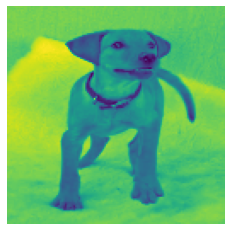

In [4]:
import random
import matplotlib.pyplot as plt
import cv2

num = random.randint(0,25000)
temp = df_random.picture[num]

temp_image = cv2.imread(r"C:\Users\guyga\Project Semester B\catsVSdogs\train\\" + temp)
temp_image = cv2.resize(temp_image, (128, 128))
temp_image = cv2.cvtColor(temp_image, cv2.COLOR_RGB2GRAY)

plt.axis("off")
plt.imshow(temp_image)

In [5]:
image_data  = []
image_label = []

for i in range(len(df_random)):
    
    image = r"C:\Users\guyga\Project Semester B\catsVSdogs\train\\" + df_random["picture"][i]
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    
    gray_scale_image = image / 255.0
    
    image_data.append(gray_scale_image)
    image_label.append(df_random["value"][i])

In [6]:
X = np.array(image_data)
y = np.array(image_label)

X = X.reshape(-1, 128 * 128)

In [7]:
X.shape

(25000, 16384)

In [8]:
np.unique(y)

array([0, 1], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.94659637,  0.81421349,  0.60043506, ..., -0.8217896 ,
        -0.81644889, -0.85240193],
       [-1.56293802, -1.59823931, -1.57532875, ..., -0.52033997,
        -0.48579221, -0.41795111],
       [-0.27232033, -0.23405469, -0.20647072, ...,  0.64024113,
         0.68653603,  0.88540136],
       ...,
       [-0.63082525, -0.72228919, -0.58110555, ..., -1.27396406,
        -1.11704588, -1.25689062],
       [ 0.32996792,  0.34033883,  0.35548152, ..., -1.00265938,
        -0.99680709, -0.98723149],
       [-0.34402131, -0.66484984, -1.01337651, ..., -0.88207953,
        -1.49279211, -1.54153082]])

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
pca.fit(X_train)
X_pca=pca.transform(X_train)

pca.fit(X_test)
X_pca_test=pca.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

check = []
preds = []
for k in range(5, 6):
    clf1 = KNeighborsClassifier(n_neighbors = k)
    clf1.fit(X_pca, y_train)
    y_pred1 = clf1.predict(X_pca_test)
    preds.append(y_pred1)
    check.append(accuracy_score(y_test,y_pred1))
    
print(check.index(max(check)) + 5)
y_pred1 = preds[check.index(max(check))]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred1)
print("Accuracy:",result2)

5
Confusion Matrix:
[[1717 2038]
 [1558 2187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49      3755
           1       0.52      0.58      0.55      3745

    accuracy                           0.52      7500
   macro avg       0.52      0.52      0.52      7500
weighted avg       0.52      0.52      0.52      7500

Accuracy: 0.5205333333333333


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf1, X_pca, y_train, cv=3, scoring="accuracy")

array([0.58947549, 0.58940511, 0.59129093])

#### Almost 60% accuracy with only 32 components out of the original 16384.

In [13]:
from sklearn.linear_model import SGDClassifier

clf2 = SGDClassifier(random_state = 42)
clf2.fit(X_train, y_train)

cross_val_score(clf2, X_pca, y_train, cv=3, scoring="accuracy")

array([0.51954062, 0.50797188, 0.51020058])

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

y_pred2 = cross_val_predict(clf2, X_pca, y_train, cv=3)

confusion_matrix(y_train, y_pred2)

array([[4506, 4239],
       [4291, 4464]], dtype=int64)

#### This is worse